## Exploring a surface mesh

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from tvb.simulator.lab import *

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


Surface level simulations in TVB use a triangular mesh surface to represent the 
folded cortical surface, similar triangular mesh surfaces are used to represent 
the boundaries between brain and skull, skull and skin, and skin and air, that 
are used in the calculation of EEG and MEG forward solutions. This tutorial 
covers a few basic ways of looking at the properties of these surfaces.

One of the things we'll be looking for is how well regularised the mesh is -- **a
well regularised a mesh has a narrow distribution of edge lengths and triangle 
areas**. For most uses in TVB, it is important to have a well regularised mesh. 

In [2]:
ctx = surfaces.CorticalSurface.from_file()
ctx.configure()
ctx

We can see a number of basic properties of the mesh here, such as the number of vertices,
edges and triangles making up the surface. A summary of the edge lengths is also included,
this is useful to know what scale of features, eg LocalConnectivity, we can expect to be 
able to represent on this surface. As a Cortex also has a large-scale Connectivity 
associated with it we see some "Region" information as well, here it is TVB's default 76
region connectivity matrix. As we can see, this Connectivity parcellates the cortex into 
regions with a fairly broad range of sizes.

Looking in more detail, we can plot the distributions of things like edge lengths and 
triangle areas to see in more detail whether the mesh is well regularised...

Text(0.5, 0, 'mm$^2$')

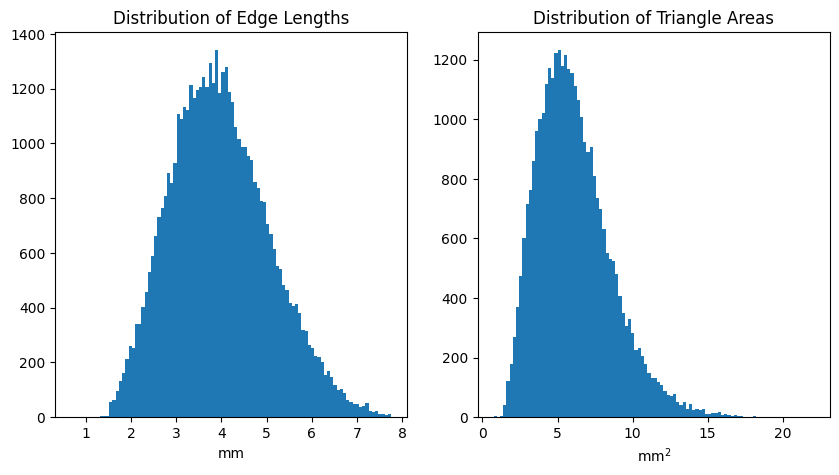

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(ctx.edge_lengths, bins=100)
plt.title("Distribution of Edge Lengths")
plt.xlabel("mm")

plt.subplot(122)
plt.hist(ctx.triangle_areas, bins=100)
plt.title("Distribution of Triangle Areas")
plt.xlabel("mm$^2$")

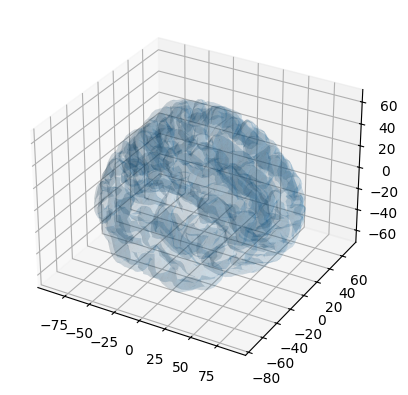

In [4]:
from tvb.simulator.plot.head_plotter_3d import HeadPlotter3D
HeadPlotter3D.display_surface(ctx)